# BeautifulSoup 教學 1｜Yahoo 股市爬蟲

新增 yahoo 新版本爬蟲程式範例<br>
網址: https://tw.stock.yahoo.com/quote/2330

In [1]:
from bs4 import BeautifulSoup
import requests
import time

headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'
}

stock_id = '2330'
url = f'https://tw.stock.yahoo.com/quote/{stock_id}'

response = requests.get(url, headers=headers)

In [2]:
response.raise_for_status()

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'lxml')

FeatureNotFound: Couldn't find a tree builder with the features you requested: lxml. Do you need to install a parser library?

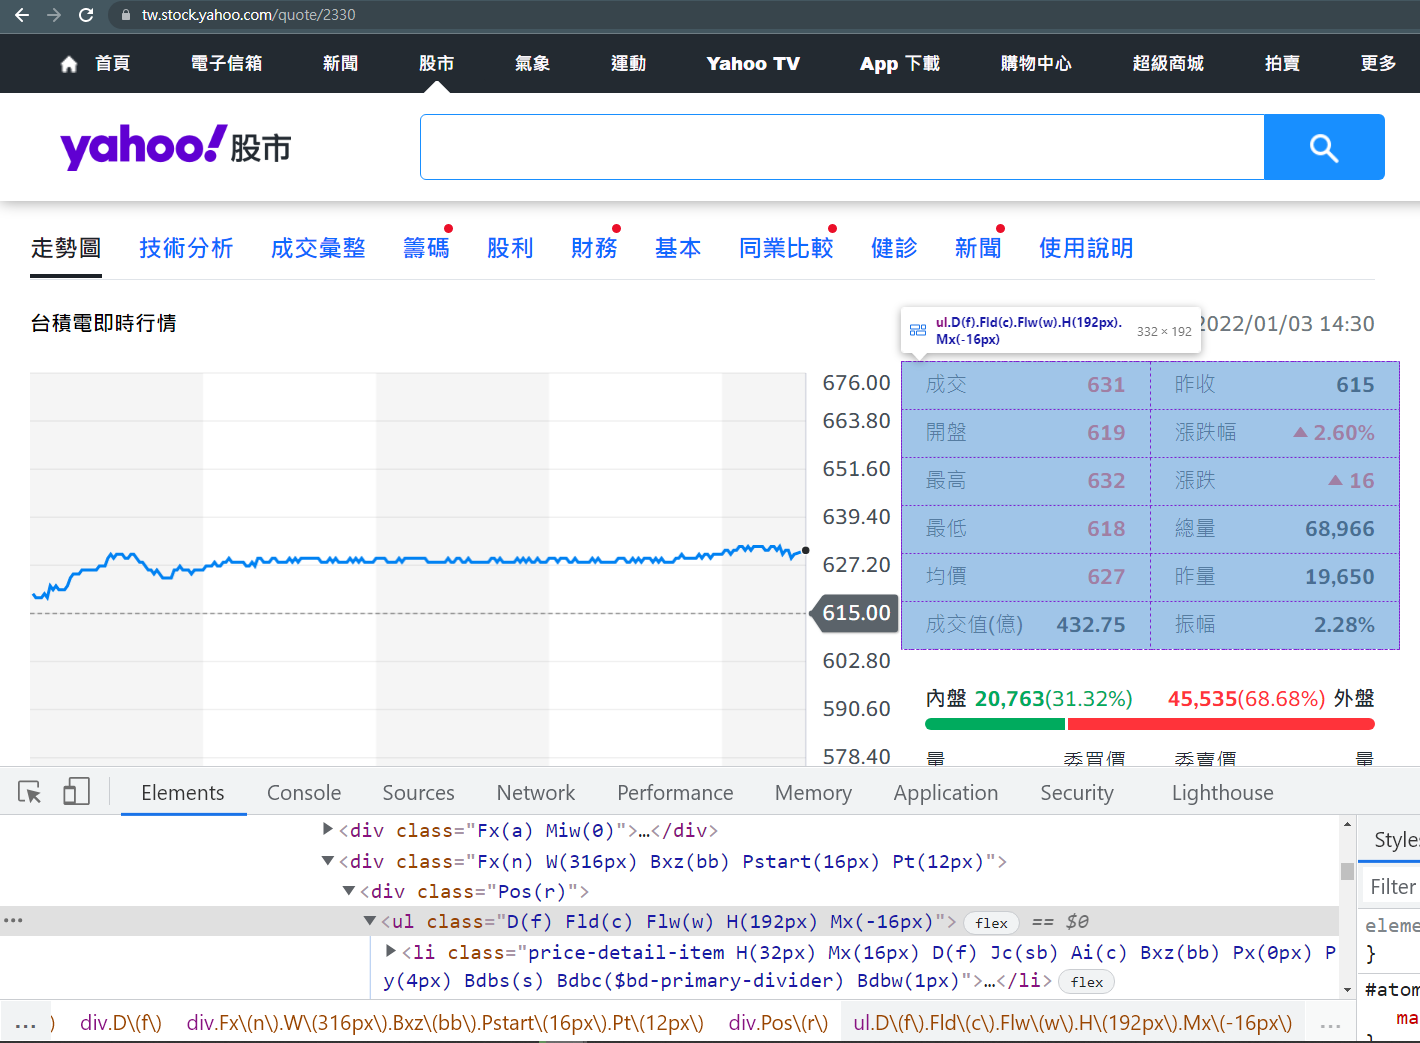

In [ ]:
# 透過class為【D(f) Fld(c) Flw(w) H(192px) Mx(-16px)】來取得ul標籤，裡面包含了成交價、開盤價、最高價等等所需資訊
ul = soup.find('ul', {'class': 'D(f) Fld(c) Flw(w) H(192px) Mx(-16px)'})

In [ ]:
# 使用 for 迴圈將所有 li 標籤內容給 print 出來
for li in ul:
    print(li.text)

成交631
開盤619
最高632
最低618
均價627
成交值(億)432.75
昨收615
漲跌幅2.60%
漲跌16
總量68,966
昨量19,650
振幅2.28%


In [ ]:
from bs4 import BeautifulSoup
import requests
import time

headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'
}

stock_id_list = ['1101', '1102', '1103']

def get_stock_price(stock_id):
    
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}'
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    
    soup = BeautifulSoup(response.text, 'lxml')
    ul = soup.find('ul', {'class': 'D(f) Fld(c) Flw(w) H(192px) Mx(-16px)'})
    
    print('股票代號', stock_id)
    for li in ul:
        print(li.text)
    
for stock_id in stock_id_list:
    
    try:
        get_stock_price(stock_id)
    except Exception as err:
        print('{}失敗：{}'.format(stock_id, err))
      
    print('-'*20)
    time.sleep(3)
    

股票代號 1101
成交47.45
開盤48.05
最高48.15
最低47.35
均價47.67
成交值(億)5.89
昨收48.00
漲跌幅1.15%
漲跌0.55
總量12,350
昨量4,616
振幅1.67%
--------------------
股票代號 1102
成交44.00
開盤44.40
最高44.45
最低43.85
均價44.11
成交值(億)1.54
昨收44.30
漲跌幅0.68%
漲跌0.30
總量3,495
昨量2,638
振幅1.35%
--------------------
股票代號 1103
成交20.70
開盤20.75
最高20.75
最低20.55
均價20.65
成交值(億)0.056
昨收20.75
漲跌幅0.24%
漲跌0.05
總量273
昨量374
振幅0.96%
--------------------
